In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('D:/DBDA Project/DBDA Project Final/digits/digits_dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={42: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.492369,0.726060,0.405709,0.573301,0.393324,0.436897,0.375276,0.333601,0.410476,0.273160,...,0.267553,0.596707,0.452055,0.567914,0.284197,0.492559,0.244615,0.439766,0.254566,0
1,0.482654,0.775688,0.411680,0.641784,0.428783,0.511874,0.424878,0.414647,0.410806,0.322470,...,0.243036,0.575496,0.507668,0.537906,0.347951,0.480721,0.287534,0.432350,0.267996,0
2,0.524942,0.835003,0.420151,0.683020,0.412023,0.521440,0.377590,0.400761,0.360579,0.289319,...,0.228300,0.586289,0.442580,0.517394,0.232191,0.421385,0.202212,0.356972,0.237859,0
3,0.653893,0.742574,0.482526,0.633177,0.414809,0.489256,0.328679,0.402120,0.259287,0.333474,...,0.322542,0.636071,0.391211,0.448107,0.283989,0.348224,0.327670,0.326649,0.384955,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,0.396621,0.756157,0.293443,0.716737,0.236275,0.616953,0.243362,0.509800,0.314641,0.440108,...,0.171861,0.541103,0.535594,0.576547,0.426150,0.605529,0.357341,0.628323,0.295749,9
2057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
2058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
2059,0.422038,0.857729,0.322249,0.792741,0.240123,0.676758,0.247068,0.575678,0.353286,0.557905,...,0.238640,0.638220,0.619354,0.694607,0.526014,0.736247,0.464618,0.773772,0.400244,9


In [6]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (2061, 43)


In [7]:
all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 1266


In [8]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [9]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (795, 43)


In [10]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (795, 42)
Labels shape = (795,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [13]:
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [14]:
# import pickle

# with open('pkl_digits.pkl', 'wb') as model_file:
#     pickle.dump(svm, model_file)

In [19]:
y_pred = svm.predict(x_test)

In [20]:
# Evaluate the accuracy
print('Accuracy Score: ', accuracy_score(y_pred, y_test))

Accuracy Score:  0.9685534591194969


In [21]:
# Evaluate the accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.91      0.87        11
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         6
           8       0.90      0.82      0.86        11
           9       1.00      1.00      1.00        33

    accuracy                           0.97       159
   macro avg       0.95      0.94      0.94       159
weighted avg       0.97      0.97      0.97       159



In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

<Axes: title={'center': 'Confusion Matrix'}>

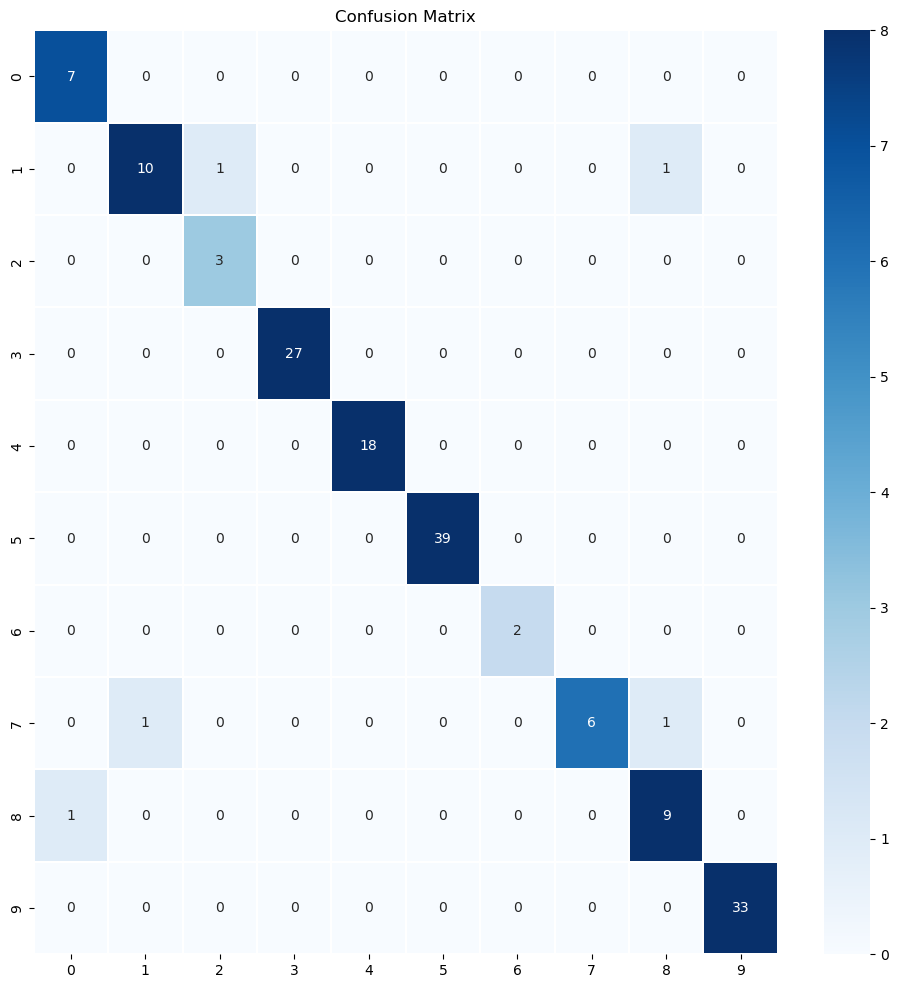

In [23]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [24]:
maping.figure.savefig("Confusion Matrix.png")